In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
filepath='/content/gdrive/My Drive/'
train = pd.read_csv(filepath+'instagram_train.csv')
print(train.shape)

Mounted at /content/gdrive
(10000, 17)


In [ ]:
train.head()

,#profile_pic,#id_len,#num_in_id,#name_len,#num_in_name,#name==id,#itro_len,#url,#private,#post,#follower_counts,#follows_counts,#highlight,#account_tag,#hash_tag,#professional,#fake
0,1,8,2,9,0,0,0,0,0,4,115,159,1,0,0,0,0
1,1,13,1,3,0,0,38,1,0,117,102,124,0,1,0,0,0
2,1,12,6,2,0,0,0,0,0,18,92,227,1,0,0,0,0
3,0,12,3,3,0,0,0,0,0,0,76,188,0,0,0,0,0
4,1,9,3,3,0,0,0,0,0,3,11,212,0,0,0,0,0


In [ ]:
train.info()  #어떤 속성으로 이루어져있는지, 결측치가 있는지 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   #profile_pic      10000 non-null  int64
 1   #id_len           10000 non-null  int64
 2   #num_in_id        10000 non-null  int64
 3   #name_len         10000 non-null  int64
 4   #num_in_name      10000 non-null  int64
 5   #name==id         10000 non-null  int64
 6   #itro_len         10000 non-null  int64
 7   #url              10000 non-null  int64
 8   #private          10000 non-null  int64
 9   #post             10000 non-null  int64
 10  #follower_counts  10000 non-null  int64
 11  #follows_counts   10000 non-null  int64
 12  #highlight        10000 non-null  int64
 13  #account_tag      10000 non-null  int64
 14  #hash_tag         10000 non-null  int64
 15  #professional     10000 non-null  int64
 16  #fake             10000 non-null  int64
dtypes: int64(17)
memory usage: 1.3 M

Text(0.5, 1.0, 'Correlation Heatmap Between Features')

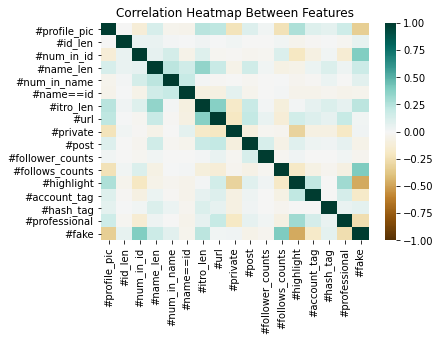

In [ ]:
#상관관계 분석
data_corr = train.corr(method='pearson')
axes = sns.heatmap(data_corr, vmin=-1, vmax=1, cmap='BrBG')
axes.set_title('Correlation Heatmap Between Features')

In [ ]:
y_train = train['#fake']
X_train = train.drop('#fake',axis=1)

## **Train dataset 진짜/가짜 계정의 개수 비교 (각 5000개씩 있음)**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count plot for accounts')

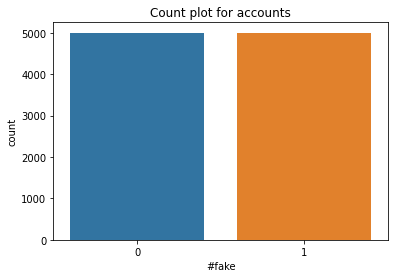

In [ ]:
account_counts = sns.countplot(y_train)
account_counts.set_title("Count plot for accounts")

In [ ]:
# 진짜 계정과 가짜 계정이 총 몇 개씩 있는지 확인 (False = 진짜 계정 , True = 가짜 계정)
unique, freq = np.unique(y_train, return_counts=True)
for i, j in zip(unique, freq):
  print('Label : ',i, ', Frequency : ', j)

Label :  0 , Frequency :  5000
Label :  1 , Frequency :  5000


In [ ]:
# 학습-검증데이터 8:2비율로
from sklearn.model_selection import train_test_split
X_train,X_valid, y_train, y_valid = train_test_split(X_train,y_train, test_size=0.2, random_state=0, shuffle=True) #shuffle사용

print('X_train = ', X_train.shape)
print('X_valid = ', X_valid.shape)
print('y_train = ', y_train.shape)
print('y_valid = ', y_valid.shape)

X_train =  (8000, 16)
X_valid =  (2000, 16)
y_train =  (8000,)
y_valid =  (2000,)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count plot for accounts in Train')

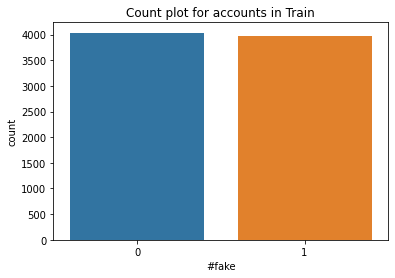

In [ ]:
account_counts = sns.countplot(y_train)
account_counts.set_title("Count plot for accounts in Train")

In [ ]:
# 진짜 계정과 가짜 계정이 총 몇 개씩 있는지 확인 (False = 진짜 계정 , True = 가짜 계정)
unique, freq = np.unique(y_train, return_counts=True)
for i, j in zip(unique, freq):
  print('Label : ',i, ', Frequency : ', j)

Label :  0 , Frequency :  4036
Label :  1 , Frequency :  3964


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count plot for accounts in Valid')

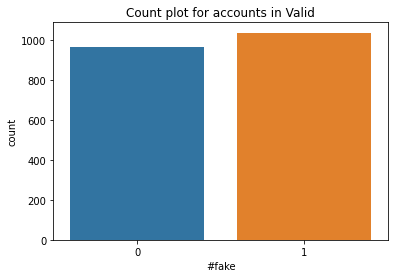

In [ ]:
account_counts = sns.countplot(y_valid)
account_counts.set_title("Count plot for accounts in Valid")

In [ ]:
# 진짜 계정과 가짜 계정이 총 몇 개씩 있는지 확인 (False = 진짜 계정 , True = 가짜 계정)
unique, freq = np.unique(y_valid, return_counts=True)
for i, j in zip(unique, freq):
  print('Label : ',i, ', Frequency : ', j)

Label :  0 , Frequency :  964
Label :  1 , Frequency :  1036


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(X_train, y_train)
train_score = rf.score(X_train, y_train)
valid_score = rf.score(X_valid, y_valid)
print('RandomForest Train_Accuracy : {}'.format(train_score))
print('RandomForest Valid_Accuracy : {}'.format(valid_score))
print()

from sklearn.ensemble import GradientBoostingClassifier
gb= GradientBoostingClassifier()
gb.fit(X_train, y_train)
train_score = gb.score(X_train, y_train)
valid_score = gb.score(X_valid, y_valid)
print('GradientBoosting Train_Accuracy : {}'.format(train_score))
print('GradientBoosting Valid_Accuracy : {}'.format(valid_score))
print()

import lightgbm as lgb
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
train_score =lgb_model.score(X_train,y_train)
valid_score= lgb_model.score(X_valid,y_valid)
print('LGBM Train_Accuracy : {}'.format(train_score))
print('LGBM Valid_Accuracy : {}'.format(valid_score))
print()


RandomForest Train_Accuracy : 1.0
RandomForest Valid_Accuracy : 0.972

GradientBoosting Train_Accuracy : 0.977375
GradientBoosting Valid_Accuracy : 0.967

LGBM Train_Accuracy : 0.9985
LGBM Valid_Accuracy : 0.9735



Text(33.0, 0.5, 'Actual')

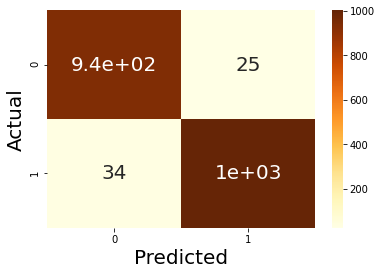

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
rf= RandomForestClassifier()
rf.fit(X_train, y_train)
pred = rf.predict(X_valid)
cm = confusion_matrix(y_valid,pred)

import seaborn as sns
sns.heatmap(cm, annot=True, annot_kws={'size':20}, cmap="YlOrBr")
plt.xlabel("Predicted", fontsize=20)
plt.ylabel("Actual",fontsize=20)
#실제로는 fake 계정인데, real계정이라고 예상한 경우 34개
#실제로는 real 계정인데, fake계정이라고 예상한 경우 25개

Text(33.0, 0.5, 'Actual')

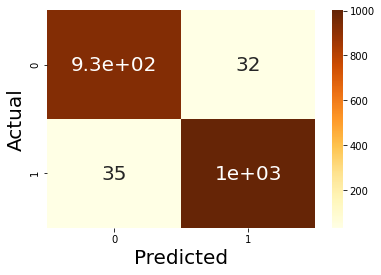

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb= GradientBoostingClassifier()
gb.fit(X_train, y_train)
pred = gb.predict(X_valid)
cm = confusion_matrix(y_valid,pred)
sns.heatmap(cm, annot=True, annot_kws={'size':20}, cmap="YlOrBr")
plt.xlabel("Predicted", fontsize=20)
plt.ylabel("Actual",fontsize=20)
#실제로는 fake 계정인데, real계정이라고 예상한 경우 35개
#실제로는 real 계정인데, fake계정이라고 예상한 경우 32개

Text(33.0, 0.5, 'Actual')

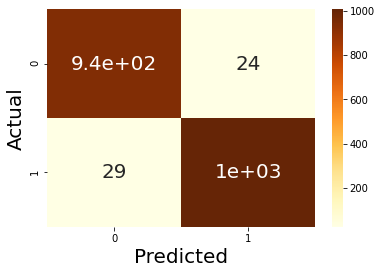

In [ ]:
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
pred = lgb_model.predict(X_valid)
cm = confusion_matrix(y_valid,pred)
sns.heatmap(cm, annot=True, annot_kws={'size':20}, cmap="YlOrBr")
plt.xlabel("Predicted", fontsize=20)
plt.ylabel("Actual",fontsize=20)
#실제로는 fake 계정인데, real계정이라고 예상한 경우 29개
#실제로는 real 계정인데, fake계정이라고 예상한 경우 24개

# 최대한 효율적인 방법 - RandomForest, LGBM, Gradient Boosting

## **TEST해보자**

In [ ]:
test = pd.read_csv(filepath+'instagram_test.csv')
print(test.shape)
y_test = test['#fake']
X_test = test.drop('#fake', axis=1)

(100, 17)


##Test용으로 100개의 계정 데이터를 넣어보자. 100개 중 몇 개를 맞출까?

###0과 1은 50개씩 들어있다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count plot for accounts')

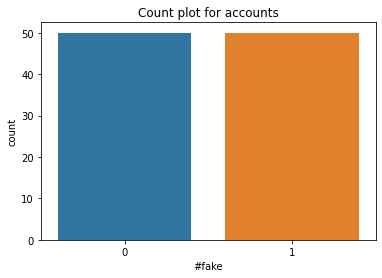

In [ ]:
#test속 0과 1의 비율
account_counts = sns.countplot(y_test)
account_counts.set_title("Count plot for accounts")

In [ ]:
#RandomForest 테스트해보기
from sklearn.metrics import accuracy_score
pred = rf.predict(X_test)
print("랜덤포레스트 이용해서 맞은 결과의 개수 : ", accuracy_score(y_test, pred)*100)

랜덤포레스트 이용해서 맞은 결과의 개수 :  97.0


In [ ]:
#Gradient_boosting 테스트해보기
pred = lgb_model.predict(X_test)
print("LGBM accuracy : ", accuracy_score(y_test, pred)*100)

LGBM accuracy :  96.0


In [ ]:
#Gradient_boosting 테스트해보기
pred = gb.predict(X_test)
print("GB accuracy : ", accuracy_score(y_test, pred)*100)

GB accuracy :  96.0


##직접 하나씩 넣어볼까?

### 먼저 가짜계정을 집어 넣어보자. 가짜 계정이라고 뜰까?

In [ ]:
#가짜계정을 직접 넣어서 확인해보자
#프로필사진, id길이, id속 숫자, 이름 길이, 이름 속 숫자, 이름==id, 소개글, url, 비공개유무, 게시물, 팔로워, 팔로잉, 하이라이트, 소개글 속 계정개수, 해쉬태그 개수, 프로페셔널계정유무 순으로 입력
p=[[1,19,4,14,0,0,0,0,0,0,3,3,0,0,0,0]]  # 학습하지 않은 가짜 계정의 정보를 입력
rf_y = rf.predict(p)
if rf_y == 0:
  print("랜덤포레스트 예상 : Real Account!")
elif rf_y==1:
  print("랜덤포레스트 예상 : Fake Account...")
lgb_y=lgb_model.predict(p)
if lgb_y == 0:
  print("LightGBM 예상 : Real Account!")
elif lgb_y==1:
  print("LightGBM 예상 : Fake Account...")
gb_y=gb.predict(p)
if gb_y == 0:
  print("Gradient Boosting 예상 : Real Account!")
elif gb_y==1:
  print("Gradient Boosting 예상 : Fake Account...")

랜덤포레스트 예상 : Fake Account...
LightGBM 예상 : Fake Account...
Gradient Boosting 예상 : Fake Account...


### 진짜 계정을 넣어보자. 진짜 계정이라고 뜰까?

In [ ]:
#진짜 계정을 직접 넣어서 돌려보자
#프로필사진, id길이, id속 숫자, 이름 길이, 이름 속 숫자, 이름==id, 소개글, url, 비공개유무, 게시물, 팔로워, 팔로잉, 하이라이트, 소개글 속 계정개수, 해쉬태그 개수, 프로페셔널계정유무 순으로 입력
x=[[0,9,0,3,0,0,0,0,1,4,265,350,0,0,0,0]]  # 학습하지 않은 진짜 계정의 정보를 입력

rf_y = rf.predict(x)
if rf_y == 0:
  print("랜덤포레스트 예상 : Real Account!")
elif rf_y==1:
  print("랜덤포레스트 예상 : Fake Account...")
lgb_y=lgb_model.predict(x)
if lgb_y == 0:
  print("LightGBM 예상 : Real Account!")
elif lgb_y==1:
  print("LightGBM 예상 : Fake Account...")
gb_y=gb.predict(x)
if gb_y == 0:
  print("Gradient Boosting 예상 : Real Account!")
elif gb_y==1:
  print("Gradient Boosting 예상 : Fake Account...")

랜덤포레스트 예상 : Real Account!
LightGBM 예상 : Real Account!
Gradient Boosting 예상 : Real Account!
